<a href="https://colab.research.google.com/github/sarojsahu123/EDA-on-Play-Store-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [9]:
#importing required modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [10]:
#importing and mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Let's access the data set
path='/content/drive/MyDrive/Play Store App Review Analysis-Saroj Sahu/'
df=pd.read_csv(path + 'Play Store Data.csv')

In [12]:
df_copy=df.copy() #creating a copy to make our original data set safe and unmodified that may be used further

In [13]:
#Exploring the Data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Let's Understand the Data set**

Our Data set has the records of the App present in Play Store.Each row/entry gives details about a single individual App.

In [14]:
#Let's fetch the columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Exploring the columns**
1.   **'App'**-Name of the App
2.   **'Category'**-To which category the app belongs(Type of App)
1.   **'Rating'**-Rating of the App in Play Store
2.   **'Reviews'**-Number of users gives their reviews on the App(obviously after installing tha App)
1.   **'Size'**-size of the App(In MB/GB/KB...)
2.   **'Installs'**-How many installation of the App from Play Store
1.   **'Type'**-App is Free or Paid
2.   **'Price'**-Price of The App
1.   **'Content Rating'**-A type of Categorical Rating of the App to say to which age group it's recommended.
2.   **'Genres'**-Movie belongs to which Genre.(A subset of Category)
1.   **'Last Updated'**-Last update Date of the App
2.   **'Current Ver'**-Cerrent Version of the App
1.   **'Android Ver'**-Minimum android version required to support the App


















Some Information regarding the DataFrame 

In [15]:
df.shape

(10841, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Let's start some **Data Cleaning**

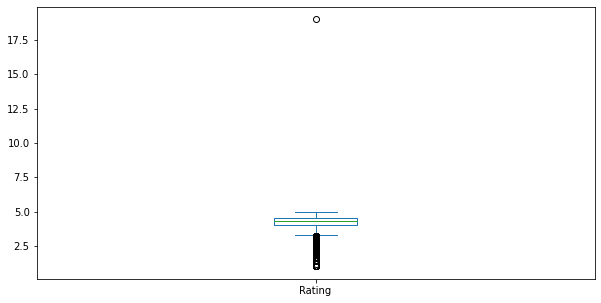

In [18]:
plt.rcParams['figure.figsize']=(10,5)
df.plot(kind='box');

There is one outlier which out of the rating range.So have to remove from the Dataset.

In [19]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
df.drop(df[df['Rating']>5].index,axis=0,inplace=True)

In [21]:
df[(df['Rating']>5) | (df['Rating']<0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Now No outlier in Data set

In [22]:
#ckecking for duplicate Entries
df[df.duplicated(keep='first')]    # Selecting duplicate rows except first

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [23]:
#Deleting the duplicate entries
df.drop_duplicates(subset=['App'],keep='first',inplace=True)  # Deleting duplicate rows except first

Now no duplicate entries in the Data set

In [24]:
df.shape

(9659, 13)

In [25]:
#Check for the NULL values in our Dataset
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

'Rating' column has highest number of NULL values,i.e.:1463

In [26]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [27]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Type ,Current Ver ,Android Ver columns have certain numbers of null values.Let's replace them with the values that are repeated for maximum times in that column.

In [28]:
print(df['Android Ver'].mode().values)
print(df['Current Ver'].mode().values)
print(df['Android Ver'].mode().values)

['4.1 and up']
['Varies with device']
['4.1 and up']


In [29]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [30]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now there is no NULL value in our Data set.

In [31]:
#we dropped some of the rows in our Data set,so reset the index of our DataFrame
df.reset_index(drop=True,inplace=True)

# Data Manipulation

In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In the data set some column to be converted into numeric form for some logical and comparision operations.

In [33]:
df['Reviews']=df['Reviews'].astype('int')  #Reviews column was in other datatype format,Now it's is integer form.

In [34]:
def convert_Installs_to_numeric(installs): #Function that convert all values in 'Installs' column to Integer Format
  if '+' in installs:                      #As values in 'Installs' column are in string format
    installs=installs.replace('+','')
  if ',' in installs:
    installs=installs.replace(',','')
  return int(installs)  

In [35]:
df['Installs']=df['Installs'].apply(convert_Installs_to_numeric)

In [36]:
def convert_price_to_numeric(price):  #Values in 'Price' column are in string format so converting to numeric form   
  if '$' in price:
    price=price.replace('$','')
  if ',' in price:
    price=price.replace(',','')
  return float(price)

In [37]:
df['Price']=df['Price'].apply(convert_price_to_numeric)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 981.1+ KB


In [39]:
df.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,7.777507e+06,1.099299
std,0.494312,1.831320e+06,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.200000,9.670000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Now in the DataFrame,there is required Numeric columns that can be used for better and error less Data analysis.